<a href="https://colab.research.google.com/github/Lucid-Lifo/Data-Analysis-Using-Python/blob/main/Lab_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Visualize the following using the given dataset- alphabet_stock_data.csv
a. Create a line plot of the historical stock prices of Alphabet Inc. between two
specific dates.
b. Create a bar plot of the trading volume of Alphabet Inc. stock between two
specific dates.
c. Create a stacked histogram plot with more bins of opening, closing, high, and low
stock prices of Alphabet Inc. between two specific dates.
d. Create a scatter plot of the trading volume/stock prices of Alphabet Inc. stock
between two specific dates.
'''

import pandas as pd
import matplotlib.pyplot as plt

try:
  df=pd.read_csv('Alphabet Stock.csv')
except FileNotFoundError:
  print("file not found")

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

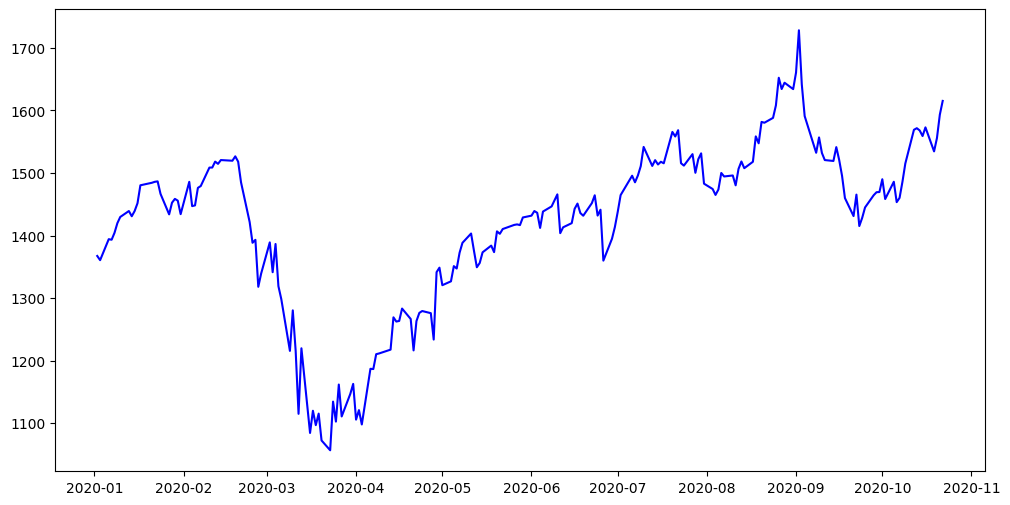

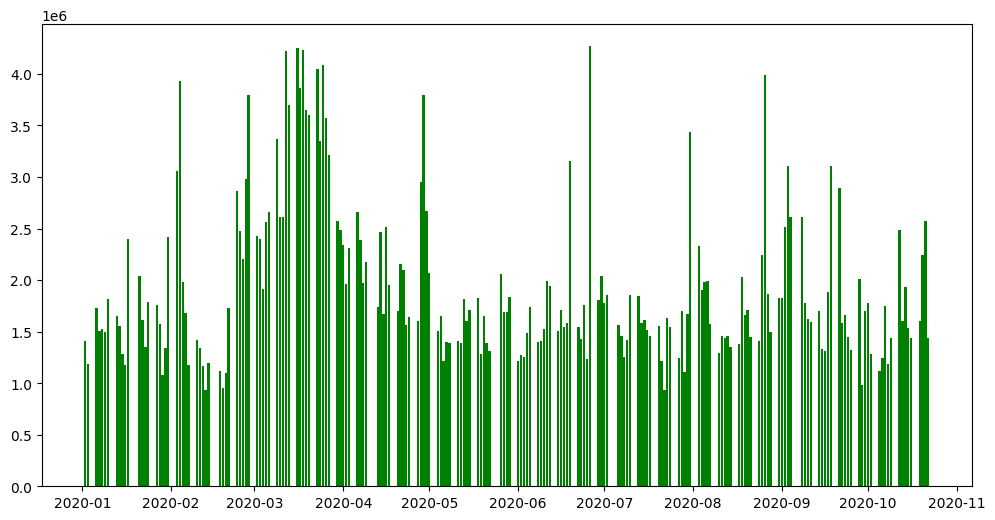

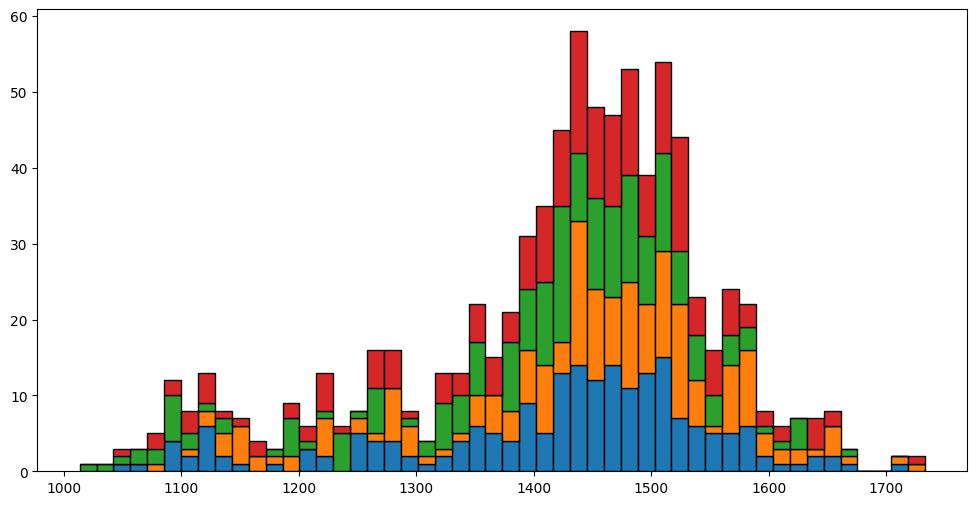

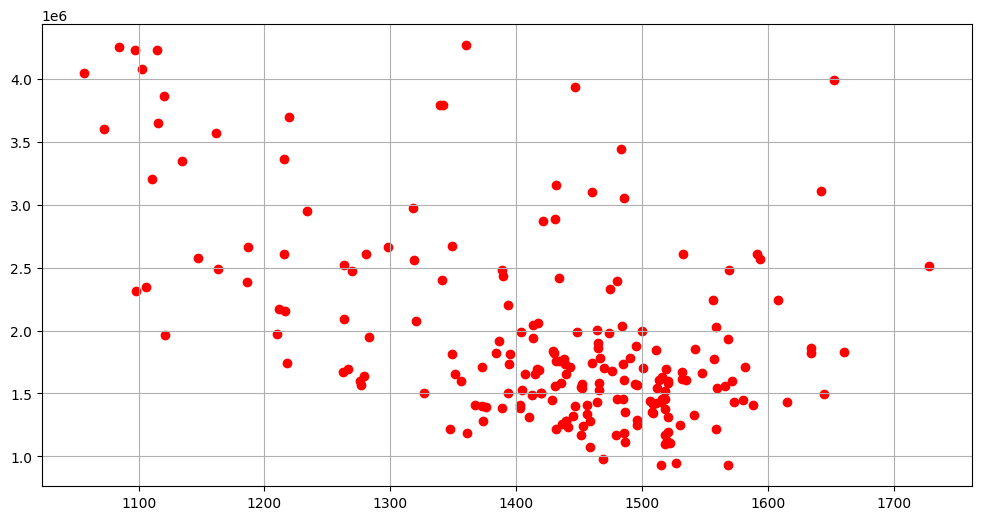

In [4]:
start_date = '2020-01-01'
end_date = '2020-10-22'
df_range = df.loc[start_date:end_date]

plt.figure(figsize=(12,6))
plt.plot(df_range.index,df_range['Close'],color='Blue',label="close price")
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df_range.index,df_range['Volume'],color='green',label="Trade Volume")
plt.show()

#Histogram
price=[df_range['Open'],df_range['High'],df_range['Low'],df_range['Close']]
label=['Open','High','Low','Close']

plt.figure(figsize=(12,6))
plt.hist(price,bins=50,stacked=True,label=label,edgecolor='Black')
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(df_range['Close'],df_range['Volume'],color='red')
plt.grid()
plt.show()

In [9]:
'''44. Handle the given datasets with adequate preprocessing steps mentioned and visualize the
dataset with appropriate graphs.
a. Handle Missing Data Values
b. Encode the categorical data
c. Scale your features
d. Normalize the data (if necessary)
Download the Datasets: Titanic Dataset, Diabetes Dataset, Breast Cancer Wisconsin
(Diagnostic) Dataset from online repositories.'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder



True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

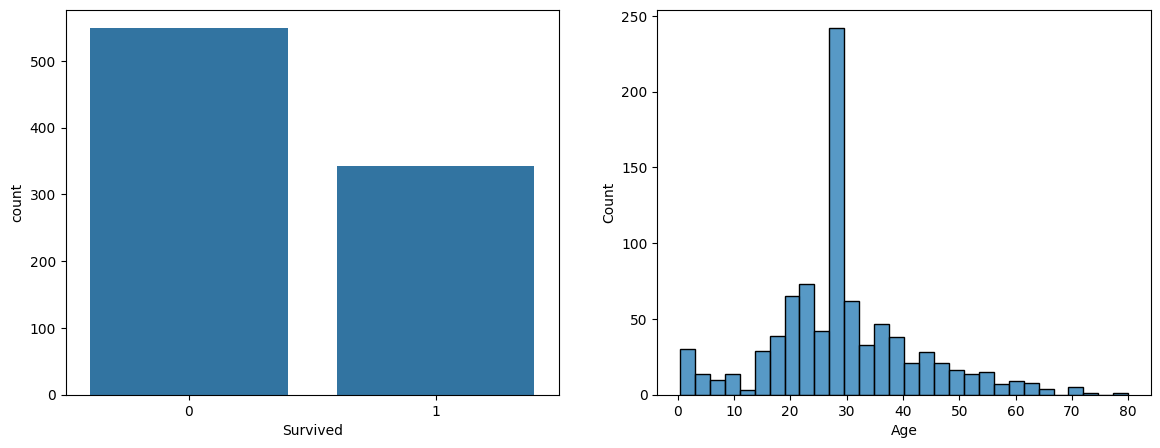

In [28]:
try:
  df = pd.read_csv('Titanic-Dataset.csv')
except FileNotFoundError:
  print("File not found")

#how to check for missing data
print(df.isnull().values.any())
print(df.isnull().sum())

#how to fill the missign data
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],inplace=True)

print(df.isnull().sum())

df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
x=df.drop('Survived',axis=1)
y=df['Survived']
scalar=MinMaxScaler()
X_scaled=scalar.fit_transform(x)
X_scaled=pd.DataFrame(X_scaled,columns=x.columns)

#visuallaisation
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='Survived',data=df,ax=axes[0])

sns.histplot(data=df,x='Age',ax=axes[1])